# Supervised classification


In [36]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In the data.csv there are letters (uppercases and lowercases) and numbers in a row format, in the cell below load the **data_all.csv** and explore it.


In [2]:
# Your code here
df = pd.read_csv('data_all.csv')

In [3]:
df.head()

,e,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
df.tail()

,e,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
116317,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116318,55.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116319,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116321,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116322 entries, 0 to 116321
Columns: 785 entries, e to 784
dtypes: float64(785)
memory usage: 696.7 MB


In [5]:
df.shape

(116322, 785)

In [6]:
df.describe()

,e,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
count,116322.000000,116322.0,116322.0,116322.0,116322.0,116322.000000,116322.000000,116322.000000,116322.000000,116322.000000,...,116322.000000,116322.0,116322.0,116322.0,116322.0,116322.0,116322.0,116322.0,116322.0,116322.0
mean,19.252695,0.0,0.0,0.0,0.0,0.000009,0.001083,0.002141,0.002149,0.001788,...,0.000172,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,17.817294,0.0,0.0,0.0,0.0,0.002932,0.369436,0.730077,0.733009,0.609863,...,0.058641,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,4.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,10.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,32.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,61.000000,0.0,0.0,0.0,0.0,1.000000,126.000000,249.000000,250.000000,208.000000,...,20.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



Now than you had identified your data, try to define your X and y (target) for next classification models.

In [7]:
# Your code here
X = np.array(df.drop(columns='e'))
y = np.array(df.e)

Before applying any model, you need to know which labels are which, to solve this you need to reshape your X-dataset into 28x28 pixels in a variable called `x_images`. <br> **Hint:** You can use *np.reshape(size of data, 28, 28))*

In [15]:
# Your code here
X_images = X.reshape(X.shape[0], 28, 28)

In [16]:
X.shape

(116322, 784)

In this way, you need to visualize some data to realize which number-labels represents a letter or a number.
<br> **Hint:** You can use *plt.imshow()*

In [18]:
df.e.unique()

array([36.,  0.,  3., 33., 30., 24., 40.,  5.,  8.,  2.,  4., 47.,  7.,
       32., 60., 18., 46., 59., 12., 37., 53., 15.,  1.,  9., 38., 43.,
       44., 19., 55.,  6., 58., 41., 20., 29., 28., 31., 42., 39., 25.,
       49., 35., 14., 57., 34., 26., 61., 11., 13., 27., 51., 23., 10.,
       22., 56., 48., 52., 16., 17., 54., 21., 50., 45.])

In [51]:
sorted(list(df.e.unique()))[:12]

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0]

0.0 is:
1.0 is:
2.0 is:
3.0 is:
4.0 is:
5.0 is:
6.0 is:
7.0 is:
8.0 is:
9.0 is:
10.0 is:
11.0 is:


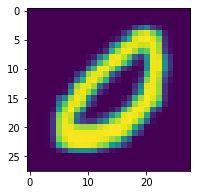

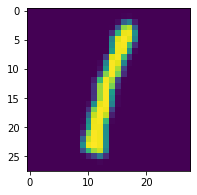

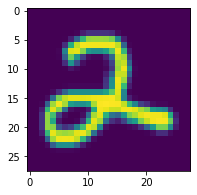

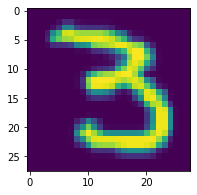

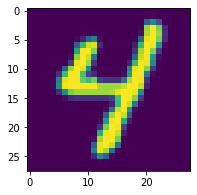

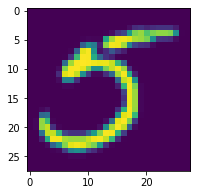

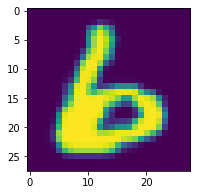

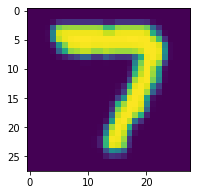

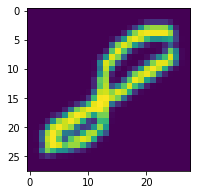

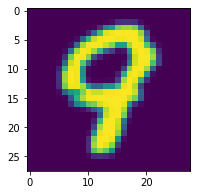

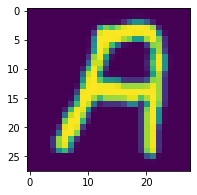

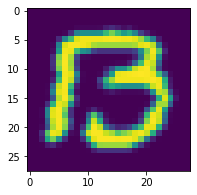

In [25]:
# Your code here
for j in sorted(list(df.e.unique()))[:12]:
    i = df[df.e == j].index[0]
    print(y[i],'is:')
    plt.figure(figsize=(3,3))
    plt.imshow(X_images[i]);

* Now, try to train a classifier model to predict the uppercases. Use every single model you know for classification.

In [30]:
# Your code here
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=.20)

In [31]:
y_train_upper,y_test_upper=np.where((y_train>9) & (y_train<36),1,0),np.where((y_test>9) & (y_test<36),1,0)


In [41]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train_upper)
y_pred_upper_rfc=rfc.predict(X_train)
y_test_pred_upper_rfc=rfc.predict(X_test)
print('Linear rfc')
print(f'Train as: {accuracy_score(y_train_upper,y_pred_upper_rfc)}, Test as: {accuracy_score(y_test_upper,y_test_pred_upper_rfc)}')
print(f'Train bas: {balanced_accuracy_score(y_train_upper,y_pred_upper_rfc)}, Test bas: {balanced_accuracy_score(y_test_upper,y_test_pred_upper_rfc)}')
print(f'Train ps: {precision_score(y_train_upper,y_pred_upper_rfc,average=None)}, Test ps: {precision_score(y_test_upper,y_test_pred_upper_rfc,average=None)}')
print(f'Train rs: {recall_score(y_train_upper,y_pred_upper_rfc,average=None)}, Test rs: {recall_score(y_test_upper,y_test_pred_upper_rfc,average=None)}')
print(f'Train f1s: {f1_score(y_train_upper,y_pred_upper_rfc,average=None)}, Test f1s: {f1_score(y_test_upper,y_test_pred_upper_rfc,average=None)}')
#print(f'Train conf_matrix:\n {confusion_matrix(y_train_upper,y_pred_upper_rfc)}\nTest conf_matriz: \n{confusion_matrix(y_test_upper,y_test_pred_upper_rfc)}')
#print('Train')
#plot_confusion_matrix(rfc,X_train,y_train_upper);
#plt.show()
#print('Test')
#plot_confusion_matrix(rfc,X_test,y_test_upper);

Linear rfc
Train as: 1.0, Test as: 0.8269681274044145
Train bas: 1.0, Test bas: 0.7136832604090982
Train ps: [1. 1.], Test ps: [0.83004124 0.8102996 ]
Train rs: [1. 1.], Test rs: [0.95956802 0.4677985 ]
Train f1s: [1. 1.], Test f1s: [0.89011724 0.59315781]


[[17011     0]
 [    0  6253]]


<AxesSubplot:>

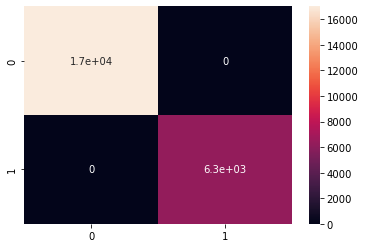

In [39]:
conf_m_rfc_train=confusion_matrix(y_train_upper,y_pred_upper_rfc)

print (conf_m_rfc_train)
sns.heatmap(conf_m_rfc_train, annot=True)

[[65144  2822]
 [13462 11630]]


<AxesSubplot:>

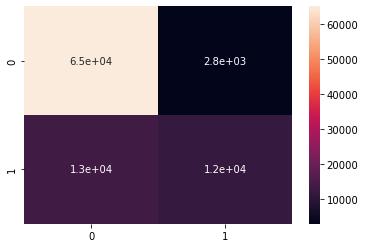

In [40]:
conf_m_rfc_test=confusion_matrix(y_test_upper,y_test_pred_upper_rfc)

print (conf_m_rfc_test)
sns.heatmap(conf_m_rfc_test, annot=True)

* Try to do the same thing with lowercases.

In [42]:
# Your code here
y_train_lower,y_test_lower=np.where(y_train>=36,1,0),np.where(y_test>=36,1,0)

In [43]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train_lower)
y_pred_lower_rfc=rfc.predict(X_train)
y_test_pred_lower_rfc=rfc.predict(X_test)
print('Linear rfc')
print(f'Train as: {accuracy_score(y_train_lower,y_pred_lower_rfc)}, Test as: {accuracy_score(y_test_lower,y_test_pred_lower_rfc)}')
print(f'Train bas: {balanced_accuracy_score(y_train_lower,y_pred_lower_rfc)}, Test bas: {balanced_accuracy_score(y_test_lower,y_test_pred_lower_rfc)}')
print(f'Train ps: {precision_score(y_train_lower,y_pred_lower_rfc,average=None)}, Test ps: {precision_score(y_test_lower,y_test_pred_lower_rfc,average=None)}')
print(f'Train rs: {recall_score(y_train_lower,y_pred_lower_rfc,average=None)}, Test rs: {recall_score(y_test_lower,y_test_pred_lower_rfc,average=None)}')
print(f'Train f1s: {f1_score(y_train_lower,y_pred_lower_rfc,average=None)}, Test f1s: {f1_score(y_test_lower,y_test_pred_lower_rfc,average=None)}')
#print(f'Train conf_matrix:\n {confusion_matrix(y_train_lower,y_pred_lower_rfc)}\nTest conf_matriz: \n{confusion_matrix(y_test_lower,y_test_pred_lower_rfc)}')
#print('Train')
#plot_confusion_matrix(rfc,X_train,y_train_lower);
#plt.show()
#print('Test')
#plot_confusion_matrix(rfc,X_test,y_test_lower);

Linear rfc
Train as: 1.0, Test as: 0.8670184186206452
Train bas: 1.0, Test bas: 0.738420902837058
Train ps: [1. 1.], Test ps: [0.86550533 0.87696314]
Train rs: [1. 1.], Test rs: [0.97882887 0.49801294]
Train f1s: [1. 1.], Test f1s: [0.91868556 0.63526777]


[[17845     0]
 [    0  5419]]


<AxesSubplot:>

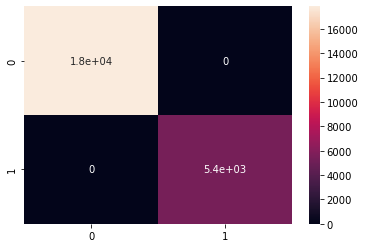

In [44]:
conf_m_rfc_train=confusion_matrix(y_train_lower,y_pred_lower_rfc)

print (conf_m_rfc_train)
sns.heatmap(conf_m_rfc_train, annot=True)

[[69906  1512]
 [10863 10777]]


<AxesSubplot:>

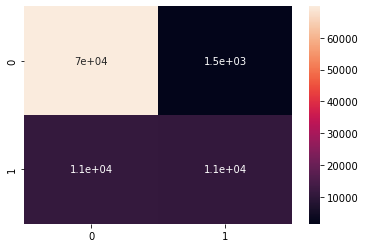

In [45]:
conf_m_rfc_test=confusion_matrix(y_test_lower,y_test_pred_lower_rfc)

print (conf_m_rfc_test)
sns.heatmap(conf_m_rfc_test, annot=True)

* Try to do the same thing with numbers.

In [46]:
# Your code here
y_train_number,y_test_number=np.where(y_train<=9,1,0),np.where(y_test<=9,1,0)

In [47]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train_number)
y_pred_number_rfc=rfc.predict(X_train)
y_test_pred_number_rfc=rfc.predict(X_test)
print('Linear rfc')
print(f'Train as: {accuracy_score(y_train_number,y_pred_number_rfc)}, Test as: {accuracy_score(y_test_number,y_test_pred_number_rfc)}')
print(f'Train bas: {balanced_accuracy_score(y_train_number,y_pred_number_rfc)}, Test bas: {balanced_accuracy_score(y_test_number,y_test_pred_number_rfc)}')
print(f'Train ps: {precision_score(y_train_number,y_pred_number_rfc,average=None)}, Test ps: {precision_score(y_test_number,y_test_pred_number_rfc,average=None)}')
print(f'Train rs: {recall_score(y_train_number,y_pred_number_rfc,average=None)}, Test rs: {recall_score(y_test_number,y_test_pred_number_rfc,average=None)}')
print(f'Train f1s: {f1_score(y_train_number,y_pred_number_rfc,average=None)}, Test f1s: {f1_score(y_test_number,y_test_pred_number_rfc,average=None)}')
#print(f'Train conf_matrix:\n {confusion_matrix(y_train_number,y_pred_number_rfc)}\nTest conf_matriz: \n{confusion_matrix(y_test_number,y_test_pred_number_rfc)}')
#print('Train')
#plot_confusion_matrix(rfc,X_train,y_train_number);
#plt.show()
#print('Test')
#plot_confusion_matrix(rfc,X_test,y_test_number);

Linear rfc
Train as: 1.0, Test as: 0.860732016591803
Train bas: 1.0, Test bas: 0.8607748433374469
Train ps: [1. 1.], Test ps: [0.86899611 0.85273596]
Train rs: [1. 1.], Test rs: [0.85095866 0.87059103]
Train f1s: [1. 1.], Test f1s: [0.8598828 0.861571 ]


[[11672     0]
 [    0 11592]]


<AxesSubplot:>

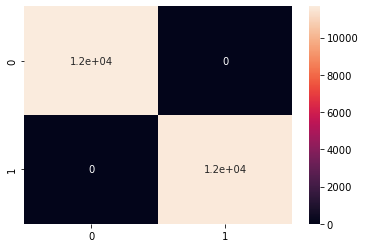

In [48]:
conf_m_rfc_train=confusion_matrix(y_train_number,y_pred_number_rfc)

print (conf_m_rfc_train)
sns.heatmap(conf_m_rfc_train, annot=True)

[[39767  6965]
 [ 5995 40331]]


<AxesSubplot:>

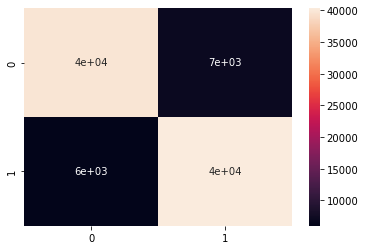

In [49]:
conf_m_rfc_test=confusion_matrix(y_test_number,y_test_pred_number_rfc)

print (conf_m_rfc_test)
sns.heatmap(conf_m_rfc_test, annot=True)